In [1]:
from fastai.text import TextLMDataBunch as lmdb, load_data
from fastai.text.learner import language_model_learner
from fastai.text.models import AWD_LSTM
from fastai.callbacks import EarlyStoppingCallback, SaveModelCallback, ReduceLROnPlateauCallback, CSVLogger
from fastai.text.models import AWD_LSTM
from fastai.train import ShowGraph
import pandas as pd
from pathlib import Path
from fastai.distributed import *

path = Path('lang_model_onecycle_resume/')

def pass_through(x):
    return x

data_lm = load_data(path, bs=128)

learn = language_model_learner(data=data_lm,
                               arch=AWD_LSTM,
                               pretrained=False)
learn.load('bestmodel')
# callbacks

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (16385650 items)
x: LMTextList
xxbos xxxfldtitle xxunk throws exception when adding product via xxup api xxxfldbody xxmaj if xxmaj google xxmaj contents xxmaj experiments is enabled , adding a product using the xxxcdb xxup v1 / products / xxxcde endpoint causes xxunk xxxfilepath line 117 to throw xxxcdb invalidargumentexception xxxcde . xxmaj with contents experiments disabled the product add completes successfully . xxmaj example valid request json : 
  xxxcdb " product " : xxxjson 
  xxxcde,xxbos xxxfldtitle xxmaj grafana xxmaj kairosdb xxmaj top n rows xxxfldbody xxmaj when xxmaj grafana pulls the data it shows all the rows returned by the query , so can we please have a query option with something like xxunk ? xxmaj so we can only show limited number of rows on xxmaj grafana unlike now it just gets and shows everything . i have also requested a xxup ui option with xxmaj grafana guys where we can choose the number of rows we wa

In [ ]:
learn.fit()

In [2]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


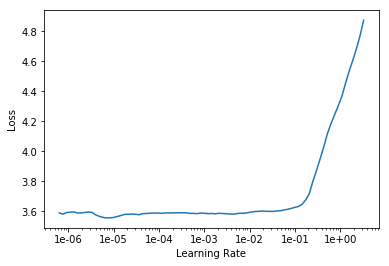

In [3]:
learn.recorder.plot()

In [4]:
learn.path

PosixPath('lang_model_onecycle_resume')

In [ ]:
escb = EarlyStoppingCallback(learn=learn, patience=4)
smcb = SaveModelCallback(learn=learn)
rpcb = ReduceLROnPlateauCallback(learn=learn, patience=3)
csvcb = CSVLogger(learn=learn)
callbacks = [escb, smcb, rpcb, csvcb]

learn.to_parallel()

learn.fit_one_cycle(cyc_len=3,
                    max_lr=1e-2*3,
                    callbacks=callbacks)